# Hypotheses Testing

## Import and Load

In [296]:
import pandas as pd
import numpy as np
import json
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
import os
FOLDER = 'Data_2/'
file_list = sorted(os.listdir(FOLDER))
file_list

['final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz']

In [298]:
import glob
## Make a filepath query
q = FOLDER + "*.csv.gz"
print(q)

Data_2/*.csv.gz


In [299]:
# Use glob.glob to get complete filepaths
file_list = glob.glob(q)
file_list

['Data_2/final_tmdb_data_2006.csv.gz',
 'Data_2/final_tmdb_data_2018.csv.gz',
 'Data_2/final_tmdb_data_2014.csv.gz',
 'Data_2/final_tmdb_data_2008.csv.gz',
 'Data_2/final_tmdb_data_2016.csv.gz',
 'Data_2/final_tmdb_data_2004.csv.gz',
 'Data_2/final_tmdb_data_2020.csv.gz',
 'Data_2/final_tmdb_data_2000.csv.gz',
 'Data_2/final_tmdb_data_2012.csv.gz',
 'Data_2/final_tmdb_data_2010.csv.gz',
 'Data_2/final_tmdb_data_2002.csv.gz',
 'Data_2/final_tmdb_data_2019.csv.gz',
 'Data_2/final_tmdb_data_2007.csv.gz',
 'Data_2/final_tmdb_data_2015.csv.gz',
 'Data_2/final_tmdb_data_2021.csv.gz',
 'Data_2/final_tmdb_data_2017.csv.gz',
 'Data_2/final_tmdb_data_2009.csv.gz',
 'Data_2/final_tmdb_data_2005.csv.gz',
 'Data_2/final_tmdb_data_2001.csv.gz',
 'Data_2/final_tmdb_data_2013.csv.gz',
 'Data_2/final_tmdb_data_2011.csv.gz',
 'Data_2/final_tmdb_data_2003.csv.gz']

In [300]:
# Use glob.glo0b to get complete filepaths and sort
q = FOLDER + "final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data_2/final_*.csv.gz


['Data_2/final_tmdb_data_2000.csv.gz',
 'Data_2/final_tmdb_data_2001.csv.gz',
 'Data_2/final_tmdb_data_2002.csv.gz',
 'Data_2/final_tmdb_data_2003.csv.gz',
 'Data_2/final_tmdb_data_2004.csv.gz',
 'Data_2/final_tmdb_data_2005.csv.gz',
 'Data_2/final_tmdb_data_2006.csv.gz',
 'Data_2/final_tmdb_data_2007.csv.gz',
 'Data_2/final_tmdb_data_2008.csv.gz',
 'Data_2/final_tmdb_data_2009.csv.gz',
 'Data_2/final_tmdb_data_2010.csv.gz',
 'Data_2/final_tmdb_data_2011.csv.gz',
 'Data_2/final_tmdb_data_2012.csv.gz',
 'Data_2/final_tmdb_data_2013.csv.gz',
 'Data_2/final_tmdb_data_2014.csv.gz',
 'Data_2/final_tmdb_data_2015.csv.gz',
 'Data_2/final_tmdb_data_2016.csv.gz',
 'Data_2/final_tmdb_data_2017.csv.gz',
 'Data_2/final_tmdb_data_2018.csv.gz',
 'Data_2/final_tmdb_data_2019.csv.gz',
 'Data_2/final_tmdb_data_2020.csv.gz',
 'Data_2/final_tmdb_data_2021.csv.gz']

In [301]:
## Use list comprehension to load in all files into 1 dataframe
pd.set_option('display.max_columns', None)
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG


In [302]:
# remove ids that are 0 and then reset index
df = df.loc[df['imdb_id']!= '0']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 1 to 3532
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   backdrop_path          36994 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60130 non-null  float64
 5   genres                 60130 non-null  object 
 6   homepage               14776 non-null  object 
 7   id                     60130 non-null  float64
 8   original_language      60130 non-null  object 
 9   original_title         60130 non-null  object 
 10  overview               58761 non-null  object 
 11  popularity             60130 non-null  float64
 12  poster_path            54382 non-null  object 
 13  production_companies   60130 non-null  object 
 14  production_countries   60130 non-null  object 
 15  rel

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R


In [303]:
# reset index and drop old index
df = df.reset_index(drop = True)

## 1st Hypothesis Test

**Does the MPAA rating of a movie affect how much revenue the movie generates?**

**Null Hypotheses:** 
* The certification of a movie does not affect the revenue the movie generates.


**Alternate Hypotheses:** 
* The certification creates a statistically significant difference in the revenue a movie generates


**Test:** 
* ANOVA (multiple groups, numeric feature)

**Assumptions:**
* Normality
* Equal variance
* No significant outliers


**Features Editing**

In [304]:
df['certification'].value_counts()

R                                  6097
NR                                 3261
PG-13                              3224
PG                                 1432
G                                   442
NC-17                               156
Unrated                               5
-                                     1
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

In [305]:
# Features editing for certification column
cert_map = {'G': 'G',
           'NC-17': 'NC-17', 
           'NR': 'NR',
           'PG': 'PG', 
           'PG-13 ': 'PG-13',
           'PG-13': 'PG-13',
           'R ': 'R',
           'R': 'R',
           'Unrated': 'NR',
           'UR': 'NR',
           'Not Rated': 'NR'}

df['certification'] = df['certification'].replace(cert_map)
df['certification'].value_counts()

R                                  6098
NR                                 3268
PG-13                              3225
PG                                 1432
G                                   442
NC-17                               156
-                                     1
ScreamFest Horror Film Festival       1
10                                    1
Name: certification, dtype: int64

In [306]:
# Dropping extra ratings
df2 = df.loc[df['certification'].isin(['G','PG','PG-13','R'])]
df2['certification'].value_counts()

R        6098
PG-13    3225
PG       1432
G         442
Name: certification, dtype: int64

In [307]:
# Filter movies with revenue
filter_financial = (df2['revenue'] >0)
filter_financial.value_counts()

False    6418
True     4779
Name: revenue, dtype: int64

In [308]:
explore_df = df2[filter_financial].copy()

In [309]:
explore_df.groupby('certification')['certification'].count()

certification
G         127
PG        630
PG-13    1717
R        2305
Name: certification, dtype: int64

**Visualization**

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_92221/397298353.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values]);


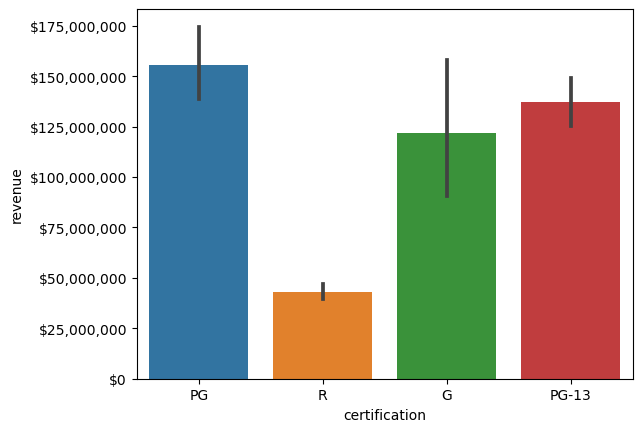

In [354]:
sns.barplot(data = explore_df, x = 'certification', y = 'revenue')
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values]);


#https://medium.com/@jlc0512/crash-course-on-seaborn-212073af69dd

In [311]:
explore_df['certification'].isnull().sum()

0

In [314]:
## Create groups dictionary. 
groups = {}

## Loop through all unique categories
for i in explore_df['certification'].unique():
    ## Get series for group and rename
    data = explore_df.loc[explore_df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

**Normality**

In [315]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,630.0,4.886246e-81,369.845936
R,2305.0,0.000000e+00,2081.603857
G,127.0,3.051788e-22,99.082289
PG-13,1717.0,0.000000e+00,1531.897339


In [316]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,630.0,4.886246e-81,369.845936,True
R,2305.0,0.000000e+00,2081.603857,True
G,127.0,3.051788e-22,99.082289,True
PG-13,1717.0,0.000000e+00,1531.897339,True


**Results:**

* P values are less than .05 so each group does not have normal distribution but the sample sizes are >20 for each group. 

**Equal Variance**

In [317]:
stats.levene(*groups.values())

LeveneResult(statistic=94.39151913914993, pvalue=2.4030190282891305e-59)

**Results:**

* Fails equal variance with p value less than .05. Will use kruskal wallis test.

**Kruskal Wallis Test**

In [318]:
kruskal_result = stats.kruskal(*groups.values())
kruskal_result

KruskalResult(statistic=562.2765600028549, pvalue=1.516637292264005e-121)

**Results:**

* P value is less than .05 so there is a significant difference. 

* Using Tukeys multiple comparison test to see between which groups there is a statistically significant difference.

**Tukeys Comparison Test**

In [319]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = explore_df['revenue']
labels = explore_df['certification']

In [320]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,33983249.9815,0.2347,-12356309.2156,80322809.1786,False
G,PG-13,15502943.4245,0.7998,-28306682.4114,59312569.2603,False
G,R,-78528011.5921,0.0,-121951084.4885,-35104938.6957,True
PG,PG-13,-18480306.557,0.1406,-40671324.0726,3710710.9585,False
PG,R,-112511261.5736,0.0,-133929039.2889,-91093483.8582,True
PG-13,R,-94030955.0165,0.0,-109218113.13,-78843796.9031,True


**FINAL CONCLUSION:**

* There are 3 significant results where reject = True above. 

* Between G and rated R, PG and R, PG-13 and R. 

* We can reject the null hypotheses in support of the alternate that there is a statistically significant difference in revenue based on certification/ratings. 

* Based on the visualization above, PG movies are the biggest earner followed by PG-13. R rated movies had the lowest revenue.  

## 2nd Hypothesis Test

**Do movies that are over 2.5 hours long earn more revenue than movies that are less than 2.5 hours?**

**NULL:**

* There is no significant difference in revenue between movies that are more than 2.5 hours long and those that are less than 2.5 hours. 

**ALTERNATE:**

* There is a statistically significant difference in revenue between movies that are more than 2.5 hours long and those that are less than 2.5 hours.  

**TEST:**

* 2Ttest

**ASSUMPTIONS:**

* Normality
* Equal Variance
* No outliers

In [321]:
# Filter movies with revenue
filter_financial2 = (df['revenue'] >0)
filter_financial2.value_counts()

False    52693
True      7437
Name: revenue, dtype: int64

In [322]:
run_df = df[filter_financial2].copy()

In [323]:
# column in minutes
run_df['runtime'].value_counts()


90.0     267
100.0    238
97.0     209
105.0    208
95.0     207
        ... 
213.0      1
366.0      1
216.0      1
191.0      1
49.0       1
Name: runtime, Length: 152, dtype: int64

In [324]:
#Checking for missing values, dropping and verifying drop
run_df['runtime'].isna().sum()

3

In [325]:
run_df= run_df.dropna(subset = ['runtime'])

In [326]:
run_df['runtime'].isna().sum()

0

**Separating groups**

In [327]:
run_df['long_runtime'] = run_df['runtime'] >= 150
run_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,long_runtime
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG,False
9,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,A film poem inspired by the Peruvian poet Césa...,7.865,/heW06kNneH6nL59h4ZoaODYXFmY.jpg,"[{'id': 157, 'logo_path': None, 'name': 'SVT D...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2000-10-06,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.2,205.0,NaN,False
10,tt0120467,0.0,NaN,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,5.300,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.5,40.0,R,False
12,tt0120630,0.0,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,Having been hopelessly repressed and facing ev...,51.339,/8XgmIsbpVamdhwcNVsYzohFZTtT.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.7,3997.0,G,False
15,tt0120753,0.0,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,8.371,/7AjzGYybwfndxnpApKXahQiq2Zy.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-09,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.9,247.0,R,False


In [328]:
# Separate the column of interest based on groups
long_df = run_df.loc[run_df['long_runtime'] ==True, ['revenue', 'long_runtime']]
short_df = run_df.loc[run_df['long_runtime'] == False, ['revenue', 'long_runtime']]
print(f'There are {len(long_df)} movies that were over 2.5 hours long.')
print(f' There are {len(short_df)} movies that were under 2.5 hours.')

There are 309 movies that were over 2.5 hours long.
 There are 7125 movies that were under 2.5 hours.


**Visualize Group Means**

In [329]:
plot_df = pd.concat([long_df, short_df], axis = 0)
plot_df

,revenue,long_runtime
61,15000000.0,True
158,465361176.0,True
240,215294342.0,True
584,4900000.0,True
749,500000.0,True
...,...,...
60086,8756.0,False
60094,6416063.0,False
60106,19002036.0,False
60107,44888959.0,False


**Visualization**

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_92221/4145425925.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values]);


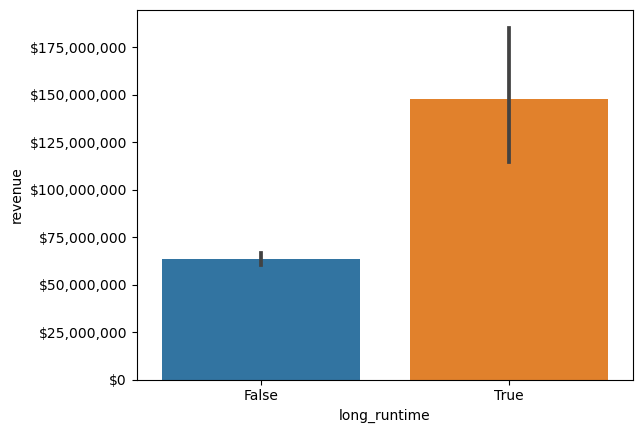

In [355]:
# Visualize means
ax = sns.barplot(data = plot_df, x = 'long_runtime', y = 'revenue')
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values]);

In [331]:
long_group = long_df['revenue']
short_group = short_df['revenue']
display(long_group.head(), short_group.head())

61      15000000.0
158    465361176.0
240    215294342.0
584      4900000.0
749       500000.0
Name: revenue, dtype: float64

3      12854953.0
9         80334.0
10        14904.0
12    224834564.0
15       105983.0
Name: revenue, dtype: float64

**Assumptions**

**Checking for outliers**

In [332]:
is_outlier_long = np.abs(stats.zscore(long_group)) >3
print(f'There are {is_outlier_long.sum()} outliers in the longrun group out of {len(long_group)}')

There are 3 outliers in the longrun group out of 309


In [333]:
long_df.loc[~is_outlier_long]

,revenue,long_runtime
61,15000000.0,True
158,465361176.0,True
240,215294342.0,True
584,4900000.0,True
749,500000.0,True
...,...,...
59381,74530532.0,True
59422,27000000.0,True
59678,25452983.0,True
59707,39629195.0,True


In [334]:
# removing outliers
long_group = long_group.loc[~is_outlier_long]
long_group

61        15000000.0
158      465361176.0
240      215294342.0
584        4900000.0
749         500000.0
            ...     
59381     74530532.0
59422     27000000.0
59678     25452983.0
59707     39629195.0
59917    402027582.0
Name: revenue, Length: 306, dtype: float64

In [335]:
# Checking short run group for outliers
is_outlier_short = np.abs(stats.zscore(short_group)) >3
print(f"There are {is_outlier_short.sum()} outliers in the shortrun group out of {len(short_group)}.")


There are 170 outliers in the shortrun group out of 7125.


In [336]:
short_group = short_group.loc[~is_outlier_short]
short_group

3         12854953.0
9            80334.0
10           14904.0
12       224834564.0
15          105983.0
            ...     
60086         8756.0
60094      6416063.0
60106     19002036.0
60107     44888959.0
60129      4588389.0
Name: revenue, Length: 6955, dtype: float64

**Normality:**

* There are >20 in each group so we can proceed with the assumption that it is sufficient. 

**Equal Variance**

In [337]:
run_result = stats.levene(long_group, short_group)
print(run_result)
print(run_result.pvalue<.05)

LeveneResult(statistic=208.11752270339676, pvalue=1.5502965698796407e-46)
True


**Result:**

* P value is < .05 so our groups do not have equal variance

* Will use equal_var = False with test to compensate. 

**T-test**

In [338]:
result2 = stats.ttest_ind(long_group, short_group, equal_var = False)
print(result2)
print(result2.pvalue<.05)

Ttest_indResult(statistic=5.613373732415974, pvalue=4.4307015354185354e-08)
True


**FINAL CONCLUSIONS:** 

* Welch's ttest returned a P value less than .05 so we can reject the null hypotheses and support the alternate that there is a significant difference in revenue between movies greater than or equal to 2.5 hours and those less than 2.5 hours. 

* Based on the averages below we can see that movies over 2.5 hours had significantly higher revenue than those under 2.5 hours. 

In [339]:
print(f" The average revenue for the longrun group was {long_group.mean():.2f}")
print(f" The average quantity for the shortrun group was {short_group.mean():.2f}")

 The average revenue for the longrun group was 126366406.14
 The average quantity for the shortrun group was 44991613.48


## 3rd Hypothesis Test

**Which ratings were the most popular?**

**NULL:**
* There is no difference in popularity between ratings.

**ALTERNATE:**
* There is a statistically significant difference in popularity between ratings. 

**TEST:**
* ANOVA

**ASSUMPTIONS:**
* Normality
* Equal variance
* No outliers

In [340]:
df['popularity'].value_counts()

0.600     10120
1.400      1481
0.840       627
1.960       238
1.176        81
          ...  
10.790        1
7.920         1
6.573         1
9.618         1
22.184        1
Name: popularity, Length: 14506, dtype: int64

In [341]:
# Using cleaned and filtered dataframe from 1st hypotheses test
df2['certification'].value_counts()

R        6098
PG-13    3225
PG       1432
G         442
Name: certification, dtype: int64

**Filtering**

In [342]:
 # Filter movies with popularity
filter_cert = (df2['popularity'] >0)
filter_cert.value_counts()

True    11197
Name: popularity, dtype: int64

In [343]:
popular_df = df2[filter_cert].copy()

In [344]:
popular_df.groupby('certification')['certification'].count()

certification
G         442
PG       1432
PG-13    3225
R        6098
Name: certification, dtype: int64

**Visualization**

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_92221/2779284557.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


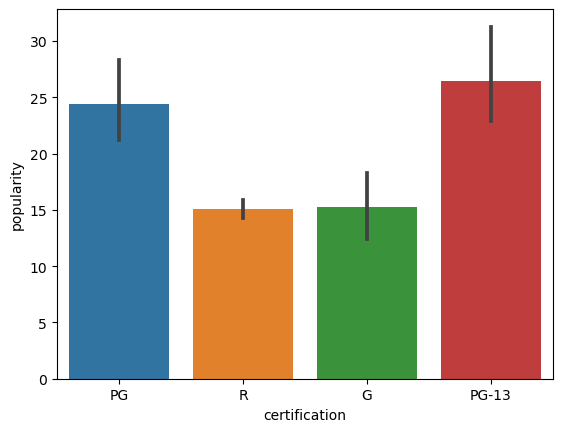

In [345]:
sns.barplot(data = popular_df, x = 'certification', y = 'popularity')
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [346]:
## Create groups dictionary. 
groups2 = {}

## Loop through all unique categories
for i in popular_df['certification'].unique():
    ## Get series for group and rename
    data2 = popular_df.loc[popular_df['certification']==i,'popularity'].copy()
    
    # save into the dictionary
    groups2[i] = data2
groups2.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

**Normality:**
* There are >20 present in each group so we can safely bypass this assumption. 

**Equal Variance:**
* Failed test for equal variance as p was less than .05
* Will use Kruskal Wallis test

In [347]:
stats.levene(*groups2.values())

LeveneResult(statistic=20.14579466176156, pvalue=5.128143216990521e-13)

**Kruskal Wallis Test**

In [348]:
kruskal_result2 = stats.kruskal(*groups2.values())
kruskal_result2

KruskalResult(statistic=163.1086602414628, pvalue=3.9104034658882125e-35)

**Result:**
* P value is less than .05, so we can reject the null hypotheses in support of the alternate that there is a statistically significant difference in popularity between ratings. 

In [349]:
## save the values
values2 = popular_df['popularity']
labels2 = popular_df['certification']

**Tukeys Comparison Test**

In [350]:
## perform tukey's multiple comparison test and display the summary
tukeys_results2 = pairwise_tukeyhsd(values2,labels2)
tukeys_results2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,9.1226,0.0811,-0.7284,18.9736,False
G,PG-13,11.2184,0.0092,2.0359,20.4008,True
G,R,-0.1819,0.9999,-9.0998,8.736,False
PG,PG-13,2.0958,0.7851,-3.6532,7.8449,False
PG,R,-9.3045,0.0,-14.6208,-3.9882,True
PG-13,R,-11.4003,0.0,-15.3421,-7.4585,True


**FINAL CONCLUSION:**
* There are 3 significant results where reject = True above. 
* There are statistically significant differences in popularity between G and PG-13 movies, PG and R and finally PG-13 and R rated movies. 
* As shown in the visualization above, PG-13 movies have the highest popularity rating followed by PG rated movies.  